In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Lendo o Dataset
DATA = "datasets/Mall_Customers.csv"

df = pd.read_csv(DATA, sep=',')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Selecionando as features
features = ["Annual Income (k$)", "Spending Score (1-100)"]
X = df[features].values

# Transformando as features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

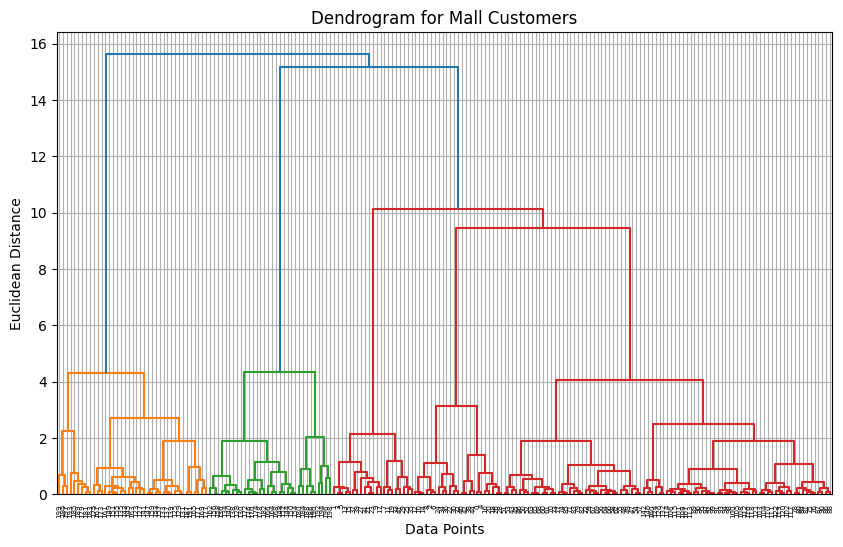

In [4]:
# Plotando o Dendrograma

plt.figure(figsize=(10, 6))
linked = linkage(X_scaled, method='ward')

dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title('Dendrogram for Mall Customers')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.grid(True)
plt.show()

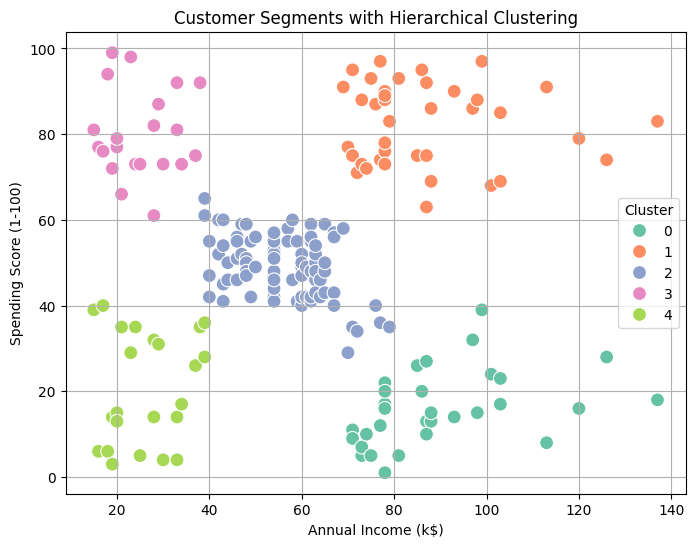

In [6]:
# Aplicando o agrupamento hierarquico baseado no dendograma

n_clusters = 5
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels = hc.fit_predict(X_scaled)

# Adicionando os clusteres ao dataset para visualização
df['Cluster'] = labels

# Visualização

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="Set2",
    data=df,
    s=100
)

plt.title('Customer Segments with Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()